# **Import dependencies**

In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from flasc.dataframe_operations import (
    dataframe_filtering as dff,
    dataframe_manipulations as dfm,
)
from flasc.turbine_analysis import ws_pow_filtering as wspf
# from flasc import time_operations as fto

from models import load_floris

In [2]:
# User settings
save_figures = True
plot_figures_in_notebook = True

# **Step 0**: Initial data pulldown
First, we import the formatted SMARTEOLE SCADA data from the postprocessed folder.

In [3]:
def load_data():
    root_path = os.getcwd()
    f = os.path.join(root_path, "postprocessed", "df_scada_60s_formatted.ftr")
    df_scada = pd.read_feather(f)

    # # Optionally: downsample to [x] minute averages to speed up things
    # cols_angular = [c for c in df_scada if (("wd_" in c) or ("yaw_" in c))]
    # df_scada = fto.df_downsample(
    #     df_scada,
    #     cols_angular=cols_angular,
    #     window_width=td(seconds=600),
    # )

    return df_scada

df_scada_formatted = load_data()

# Assume a fixed ambient turbulence intensity of 11%, as used in the SMARTEOLE experiment
df_scada_formatted["ti"] = 0.11

# **Step 2**: Filter the data for outliers
We apply a number of filtering operations here, like the removal of NaN wind speed/power measurements, negative wind speed/power measurements, irregularly high wind speed/power measurements, sensor-stuck type of faults, self-flagged faults (i.e., internal turbine status flags), and filtering based on deviations from the median windspeed-power curve.

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 000 increased from 3.361 % to 3.361 %. Reason: 'Wind speed and/or power is NaN'.
Faulty measurements for WTG 000 increased from 3.361 % to 3.361 %. Reason: 'Wind speed below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 000 increased from 3.361 % to 17.929 %. Reason: 'Power below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 000 increased from 17.929 % to 17.929 %. Reason: 'Wind speed above 50 m/s'.
Faulty measurements for WTG 000 increased from 17.929 % to 17.929 %. Reason: 'Power above 30 MW'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 000 increased from 17.929 % to 17.938 %. Reason: 'Power below 1 kW while wind speed above 4 m/s'.
Faulty measurements for WTG 000 increased from 17.938 % to 17.953 %. Reason: 'Curtailment: wind speed above 14 m/s but power below 1850 kW'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 000 increased from 17.953 % to 19.019 %. Reason: 'Self-flagged (is_operation_normal==False)'.
Faulty measurements for WTG 000 increased from 19.019 % to 19.021 %. Reason: 'Sensor-stuck fault'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 000 increased from 19.021 % to 19.068 %. Reason: 'Mean power curve outlier'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e



Faulty measurements for WTG 001 increased from 3.273 % to 3.273 %. Reason: 'Wind speed and/or power is NaN'.
Faulty measurements for WTG 001 increased from 3.273 % to 3.273 %. Reason: 'Wind speed below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 001 increased from 3.273 % to 17.064 %. Reason: 'Power below zero'.
Faulty measurements for WTG 001 increased from 17.064 % to 17.064 %. Reason: 'Wind speed above 50 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 001 increased from 17.064 % to 17.064 %. Reason: 'Power above 30 MW'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 001 increased from 17.064 % to 17.067 %. Reason: 'Power below 1 kW while wind speed above 4 m/s'.
Faulty measurements for WTG 001 increased from 17.067 % to 17.723 %. Reason: 'Curtailment: wind speed above 14 m/s but power below 1850 kW'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 001 increased from 17.723 % to 20.968 %. Reason: 'Self-flagged (is_operation_normal==False)'.
Faulty measurements for WTG 001 increased from 20.968 % to 20.984 %. Reason: 'Sensor-stuck fault'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 001 increased from 20.984 % to 21.065 %. Reason: 'Mean power curve outlier'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e



Faulty measurements for WTG 002 increased from 9.491 % to 9.491 %. Reason: 'Wind speed and/or power is NaN'.
Faulty measurements for WTG 002 increased from 9.491 % to 9.491 %. Reason: 'Wind speed below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 002 increased from 9.491 % to 28.731 %. Reason: 'Power below zero'.
Faulty measurements for WTG 002 increased from 28.731 % to 28.731 %. Reason: 'Wind speed above 50 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 002 increased from 28.731 % to 28.731 %. Reason: 'Power above 30 MW'.
Faulty measurements for WTG 002 increased from 28.731 % to 28.737 %. Reason: 'Power below 1 kW while wind speed above 4 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 002 increased from 28.737 % to 28.740 %. Reason: 'Curtailment: wind speed above 14 m/s but power below 1850 kW'.
Faulty measurements for WTG 002 increased from 28.740 % to 31.509 %. Reason: 'Self-flagged (is_operation_normal==False)'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 002 increased from 31.509 % to 31.518 %. Reason: 'Sensor-stuck fault'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 002 increased from 31.518 % to 31.555 %. Reason: 'Mean power curve outlier'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e



Faulty measurements for WTG 003 increased from 2.495 % to 2.495 %. Reason: 'Wind speed and/or power is NaN'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 003 increased from 2.495 % to 2.495 %. Reason: 'Wind speed below zero'.
Faulty measurements for WTG 003 increased from 2.495 % to 17.240 %. Reason: 'Power below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 003 increased from 17.240 % to 17.240 %. Reason: 'Wind speed above 50 m/s'.
Faulty measurements for WTG 003 increased from 17.240 % to 17.240 %. Reason: 'Power above 30 MW'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 003 increased from 17.240 % to 17.248 %. Reason: 'Power below 1 kW while wind speed above 4 m/s'.
Faulty measurements for WTG 003 increased from 17.248 % to 18.284 %. Reason: 'Curtailment: wind speed above 14 m/s but power below 1850 kW'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 003 increased from 18.284 % to 24.454 %. Reason: 'Self-flagged (is_operation_normal==False)'.
Faulty measurements for WTG 003 increased from 24.454 % to 24.465 %. Reason: 'Sensor-stuck fault'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 003 increased from 24.465 % to 24.499 %. Reason: 'Mean power curve outlier'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e



Faulty measurements for WTG 004 increased from 3.213 % to 3.213 %. Reason: 'Wind speed and/or power is NaN'.
Faulty measurements for WTG 004 increased from 3.213 % to 3.213 %. Reason: 'Wind speed below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 004 increased from 3.213 % to 20.155 %. Reason: 'Power below zero'.
Faulty measurements for WTG 004 increased from 20.155 % to 20.155 %. Reason: 'Wind speed above 50 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 004 increased from 20.155 % to 20.155 %. Reason: 'Power above 30 MW'.
Faulty measurements for WTG 004 increased from 20.155 % to 20.162 %. Reason: 'Power below 1 kW while wind speed above 4 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 004 increased from 20.162 % to 20.169 %. Reason: 'Curtailment: wind speed above 14 m/s but power below 1850 kW'.
Faulty measurements for WTG 004 increased from 20.169 % to 20.205 %. Reason: 'Self-flagged (is_operation_normal==False)'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 004 increased from 20.205 % to 20.211 %. Reason: 'Sensor-stuck fault'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 004 increased from 20.211 % to 20.425 %. Reason: 'Mean power curve outlier'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e



Faulty measurements for WTG 005 increased from 4.346 % to 4.346 %. Reason: 'Wind speed and/or power is NaN'.
Faulty measurements for WTG 005 increased from 4.346 % to 4.346 %. Reason: 'Wind speed below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 005 increased from 4.346 % to 22.236 %. Reason: 'Power below zero'.
Faulty measurements for WTG 005 increased from 22.236 % to 22.236 %. Reason: 'Wind speed above 50 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 005 increased from 22.236 % to 22.236 %. Reason: 'Power above 30 MW'.
Faulty measurements for WTG 005 increased from 22.236 % to 22.242 %. Reason: 'Power below 1 kW while wind speed above 4 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 005 increased from 22.242 % to 22.248 %. Reason: 'Curtailment: wind speed above 14 m/s but power below 1850 kW'.
Faulty measurements for WTG 005 increased from 22.248 % to 22.256 %. Reason: 'Self-flagged (is_operation_normal==False)'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 005 increased from 22.256 % to 22.260 %. Reason: 'Sensor-stuck fault'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 005 increased from 22.260 % to 22.681 %. Reason: 'Mean power curve outlier'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e



Faulty measurements for WTG 006 increased from 3.322 % to 3.322 %. Reason: 'Wind speed and/or power is NaN'.
Faulty measurements for WTG 006 increased from 3.322 % to 3.322 %. Reason: 'Wind speed below zero'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 006 increased from 3.322 % to 19.969 %. Reason: 'Power below zero'.
Faulty measurements for WTG 006 increased from 19.969 % to 19.969 %. Reason: 'Wind speed above 50 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 006 increased from 19.969 % to 19.969 %. Reason: 'Power above 30 MW'.
Faulty measurements for WTG 006 increased from 19.969 % to 19.975 %. Reason: 'Power below 1 kW while wind speed above 4 m/s'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 006 increased from 19.975 % to 19.983 %. Reason: 'Curtailment: wind speed above 14 m/s but power below 1850 kW'.
Faulty measurements for WTG 006 increased from 19.983 % to 19.989 %. Reason: 'Self-flagged (is_operation_normal==False)'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 006 increased from 19.989 % to 20.000 %. Reason: 'Sensor-stuck fault'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

Faulty measurements for WTG 006 increased from 20.000 % to 20.142 %. Reason: 'Mean power curve outlier'.


/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/Users/esimley/opt/anaconda3/envs/flasc_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/esimley/opt/anaconda3/envs/flasc_e

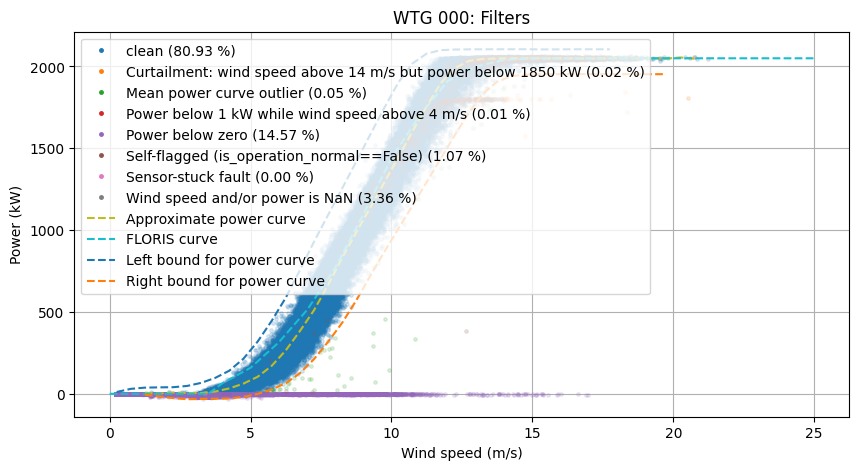

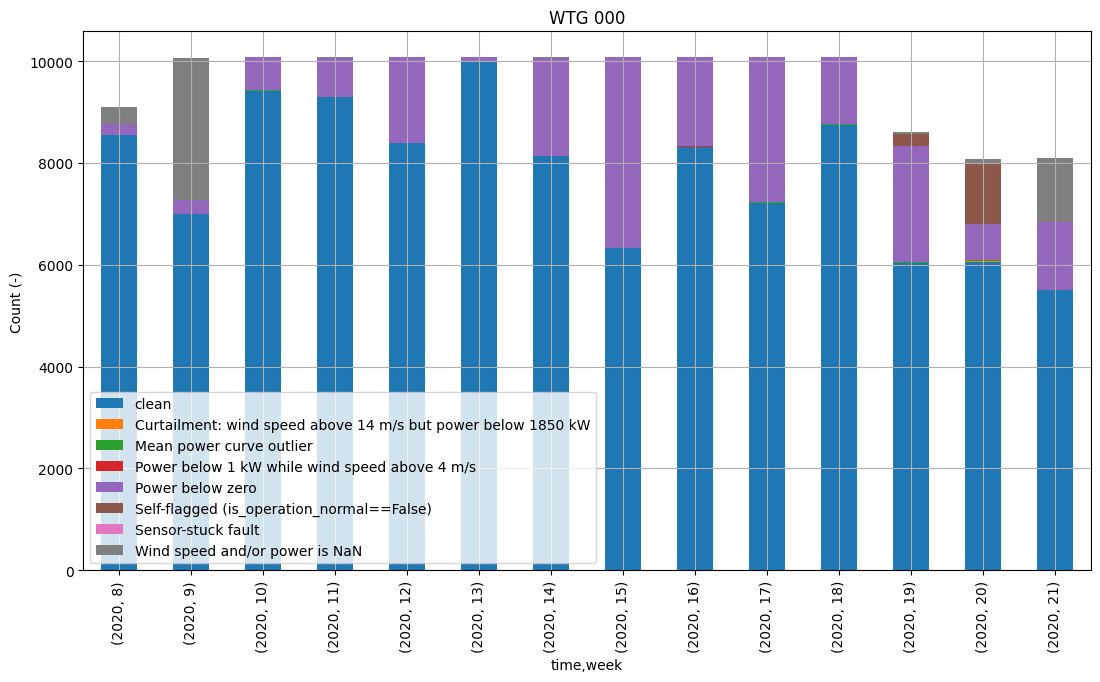

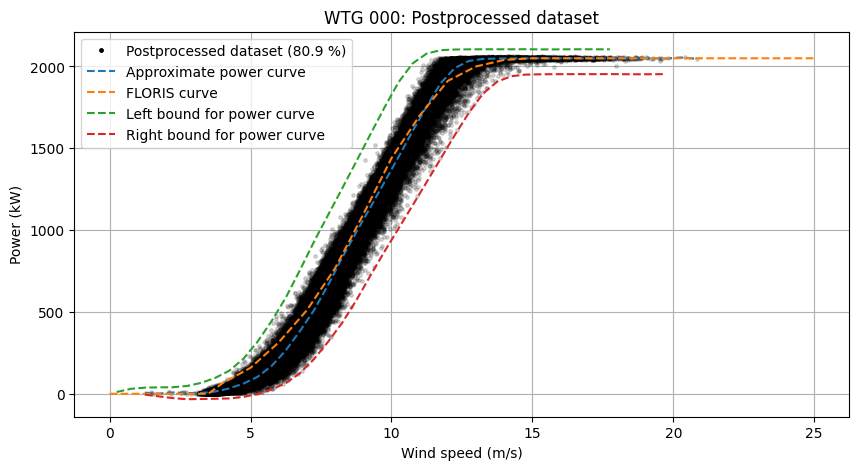

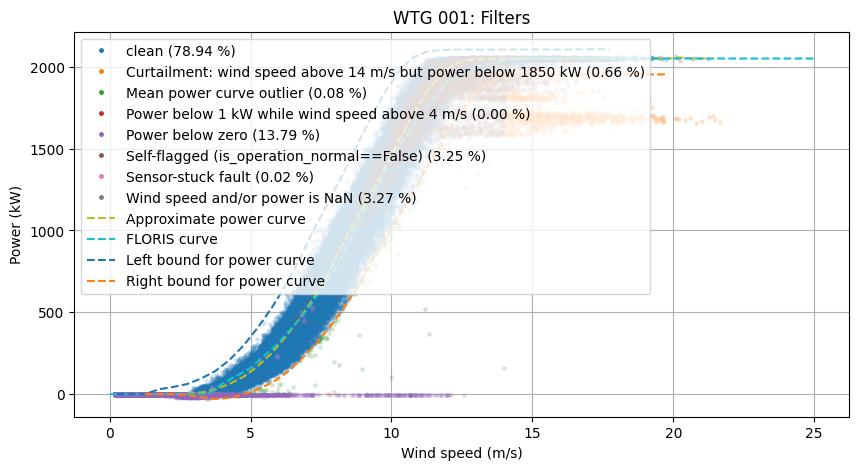

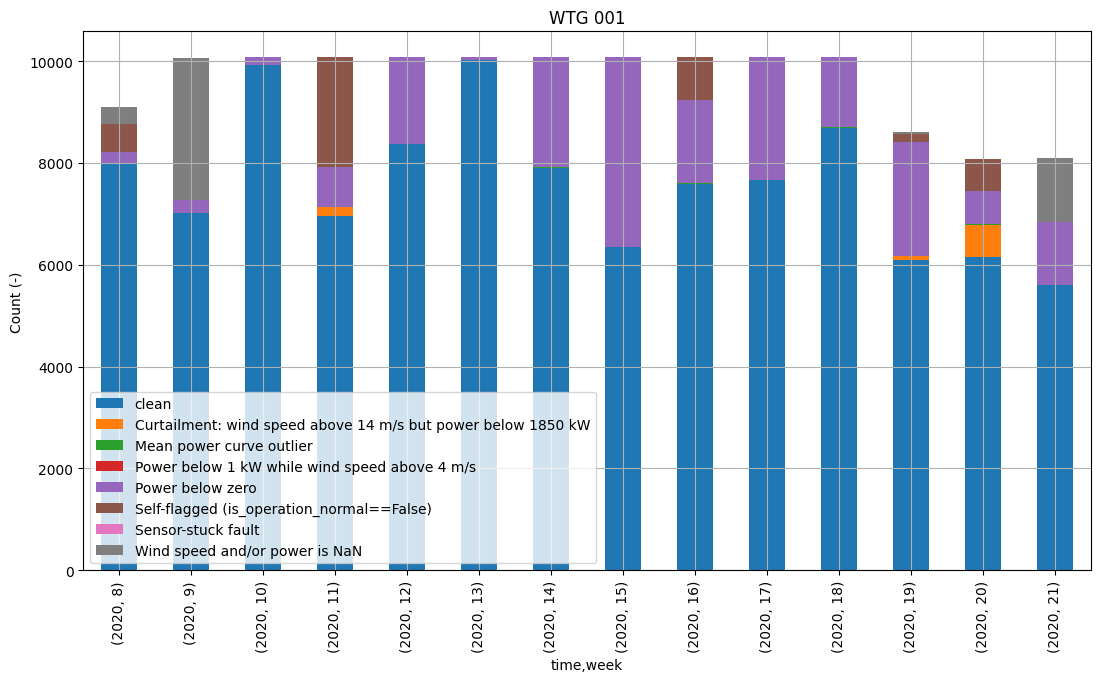

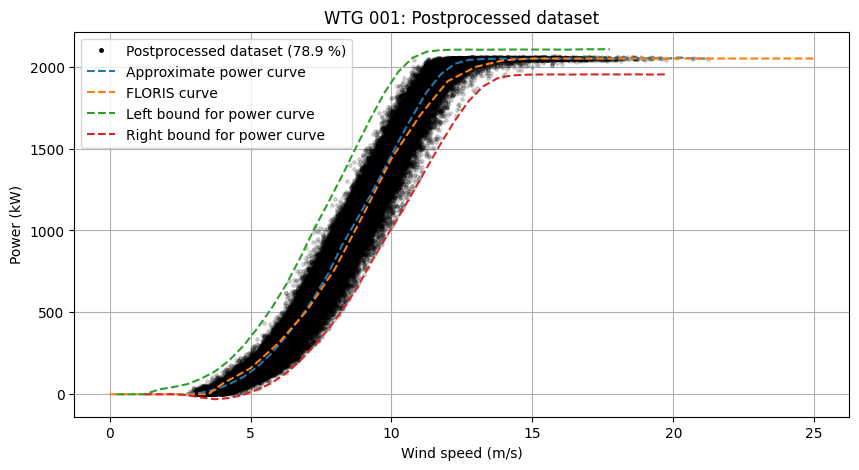

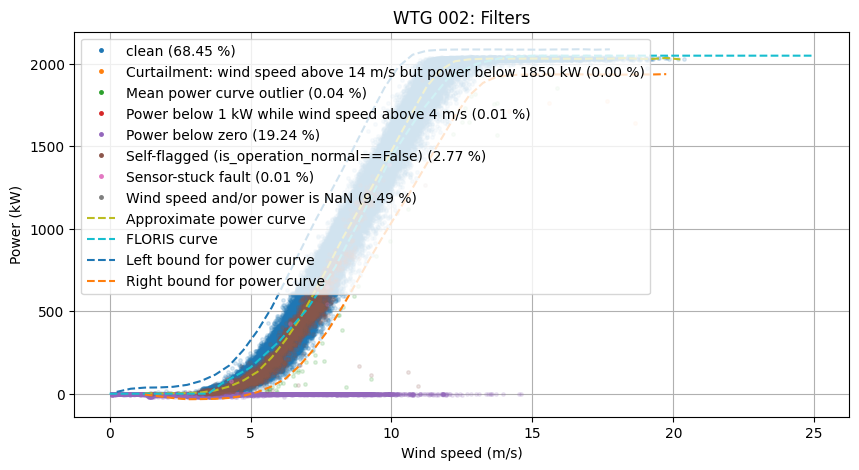

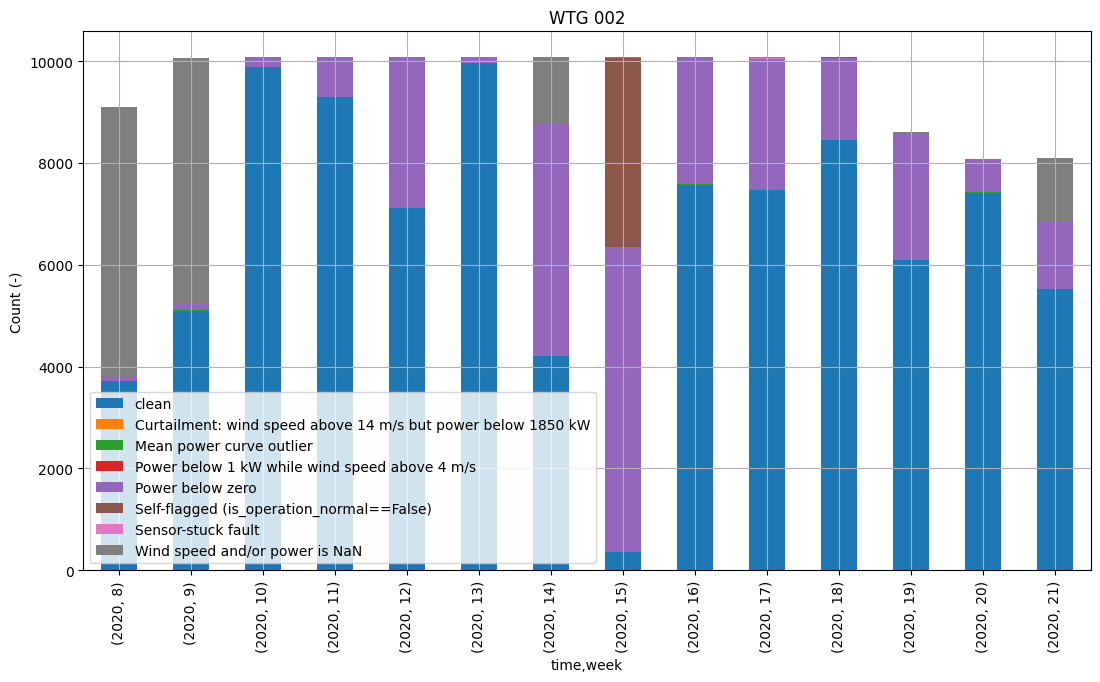

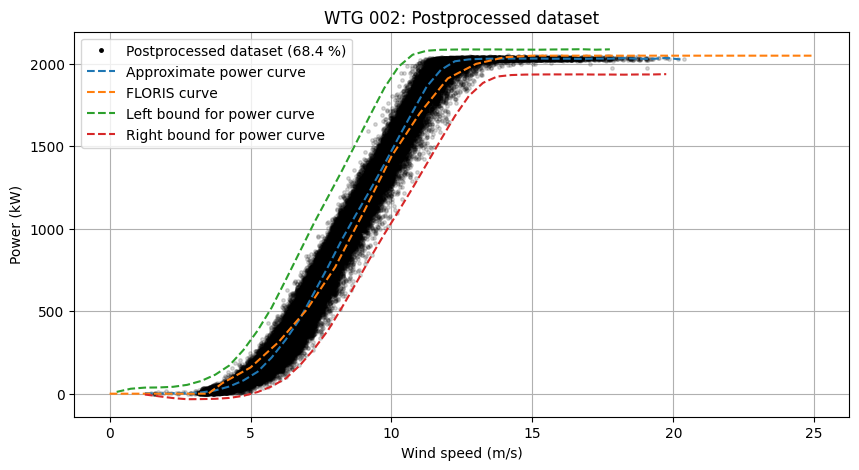

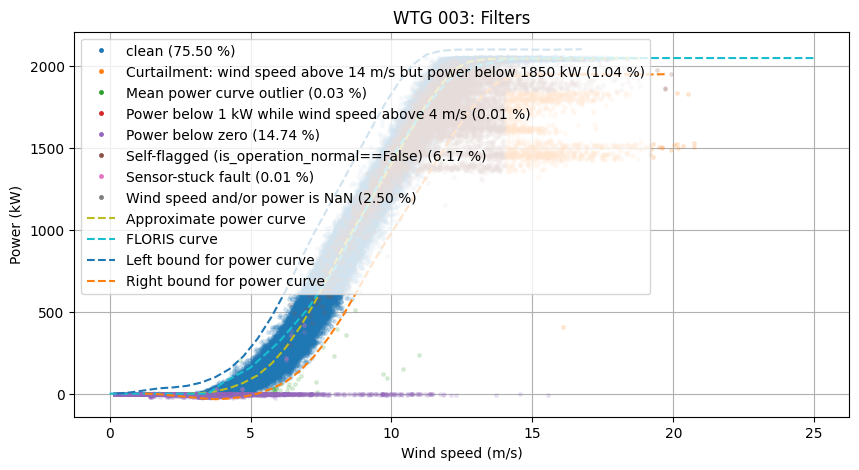

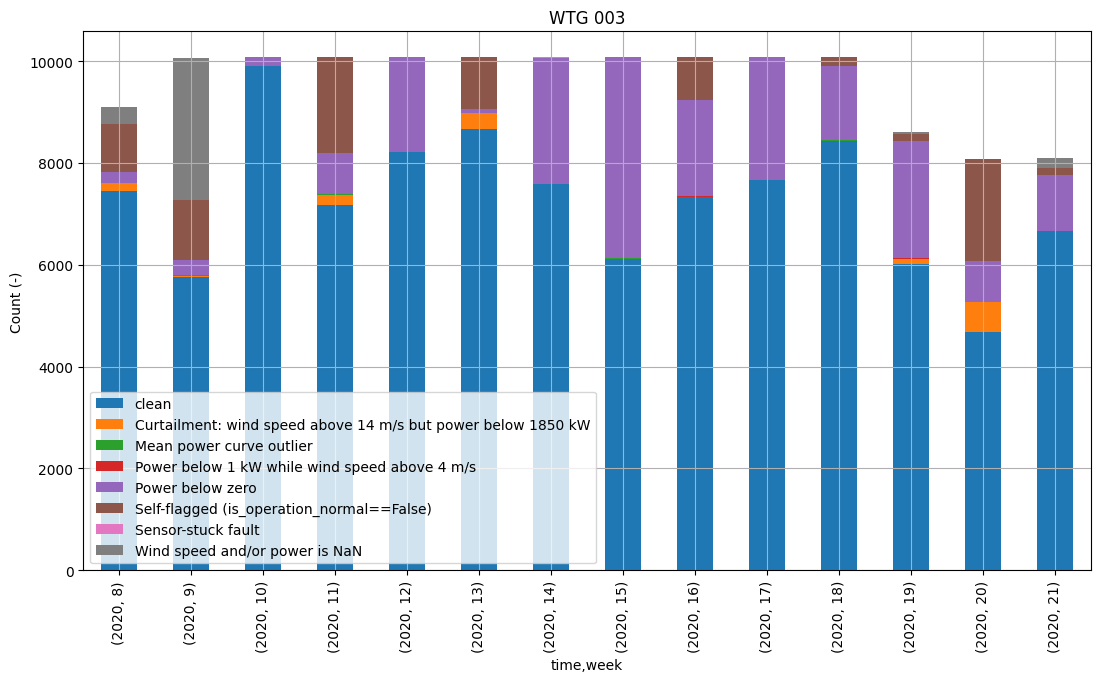

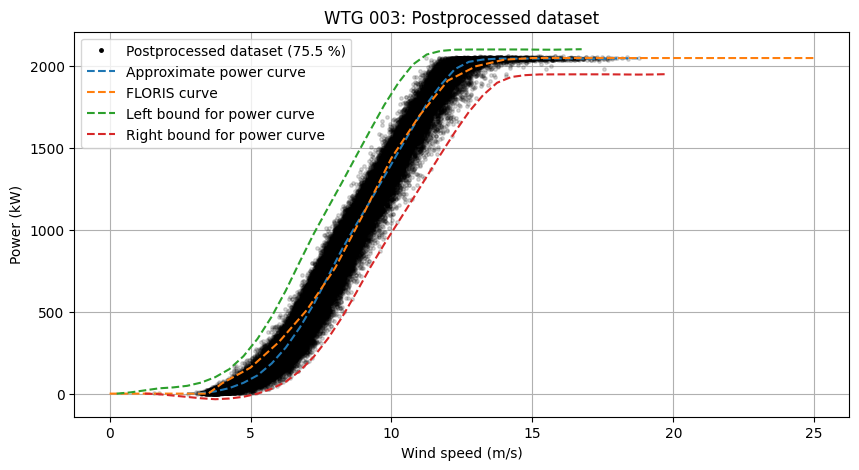

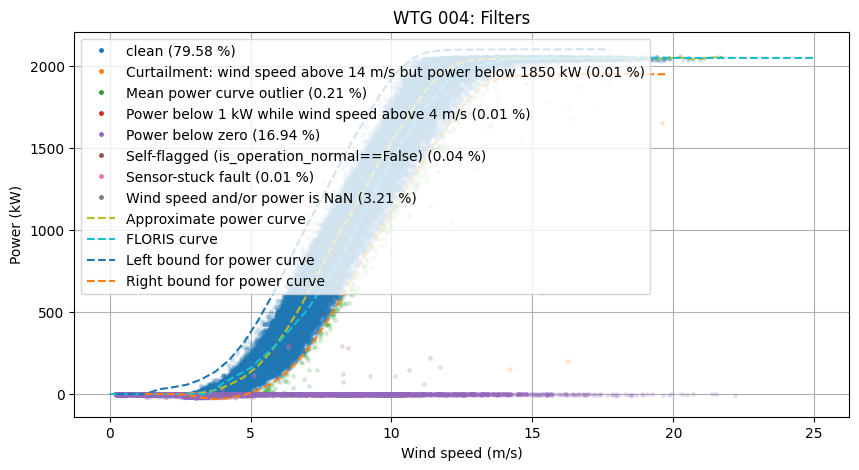

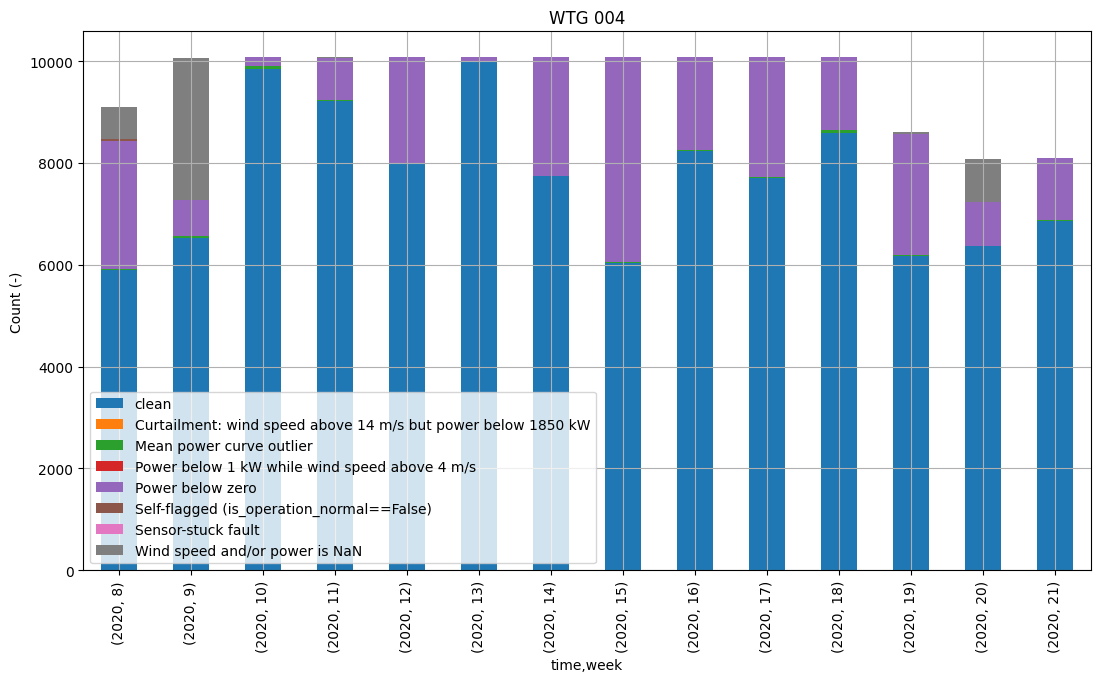

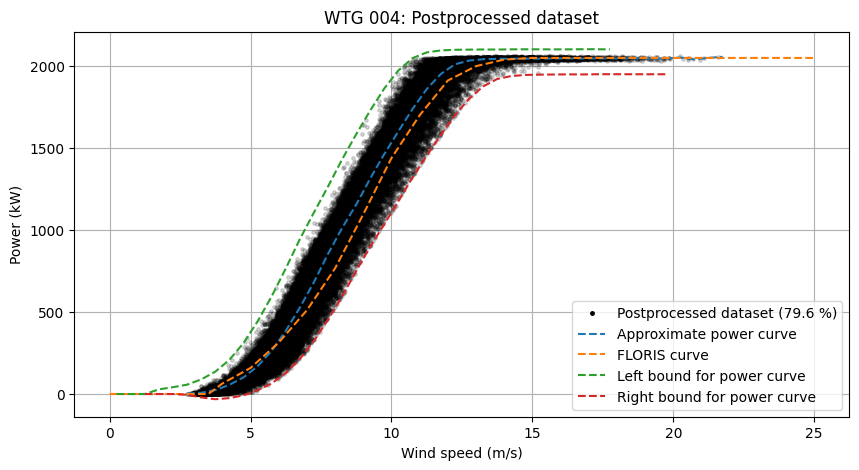

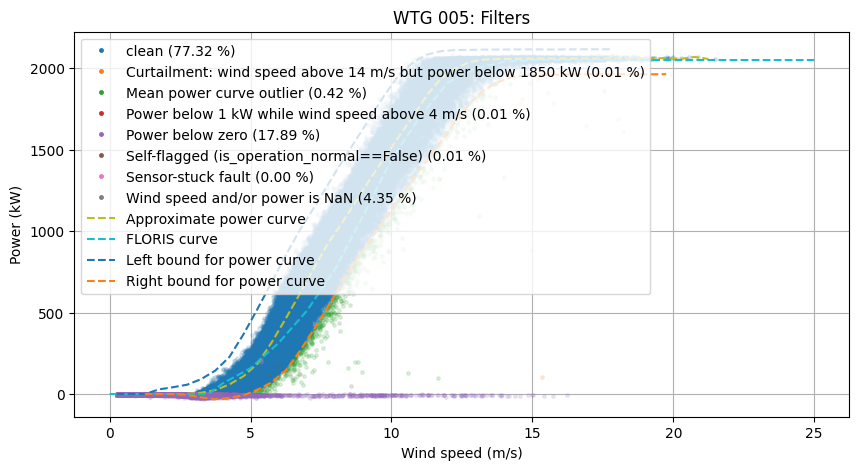

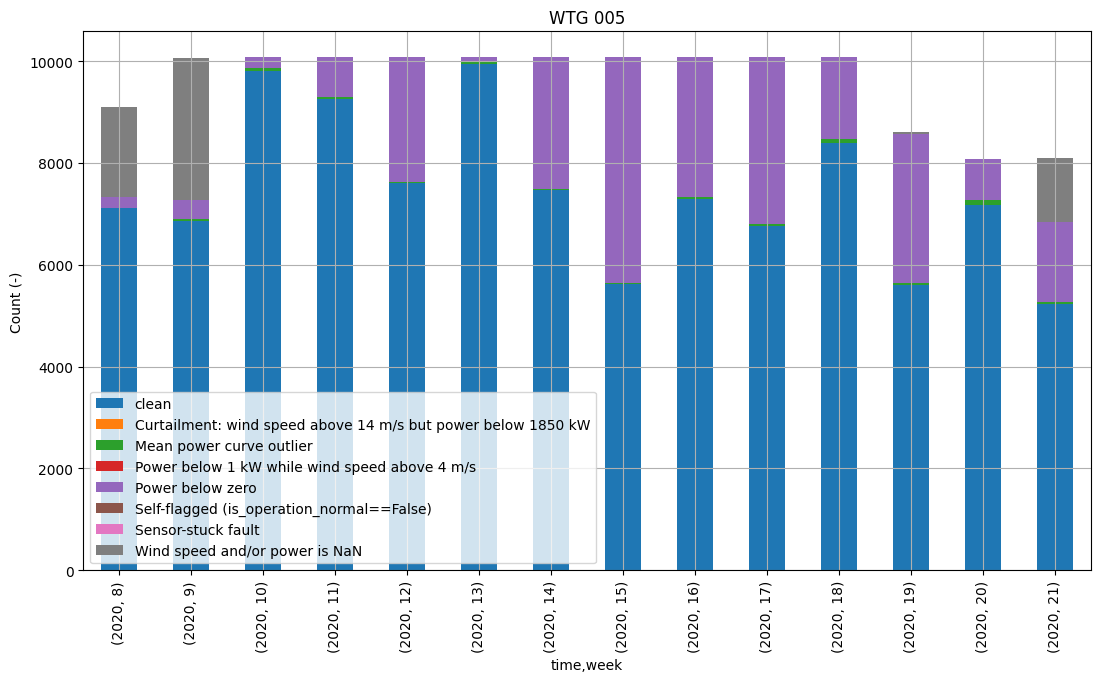

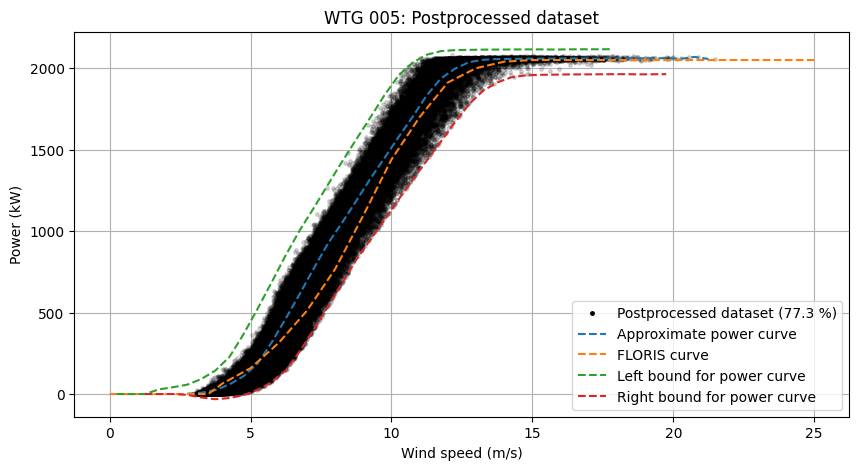

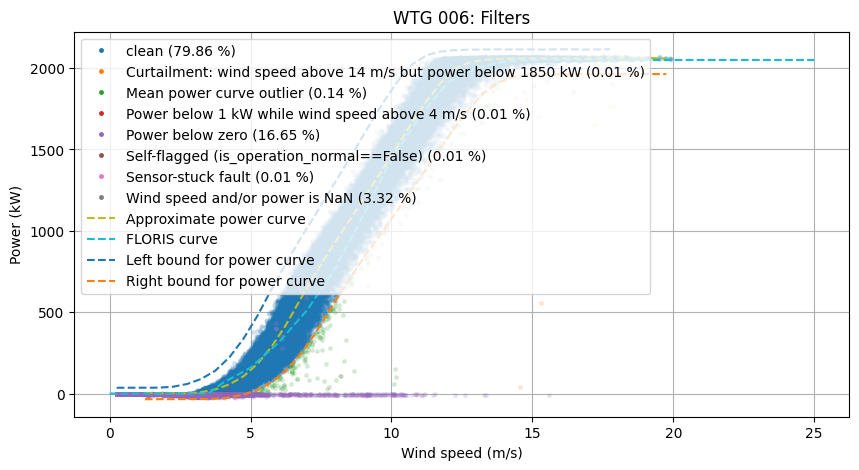

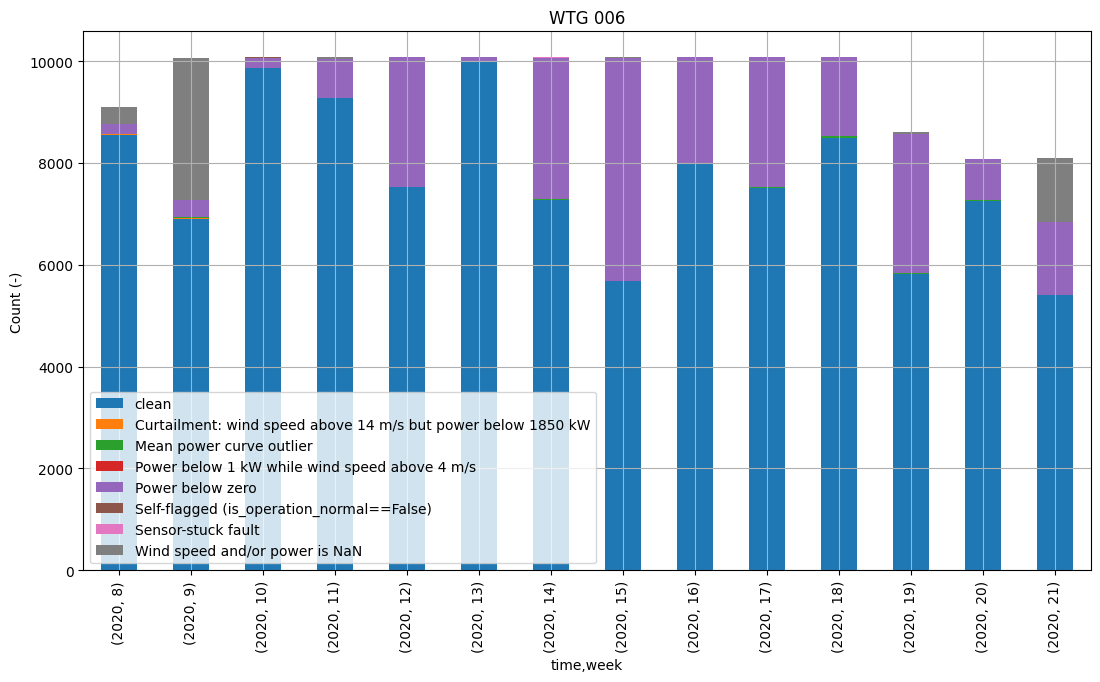

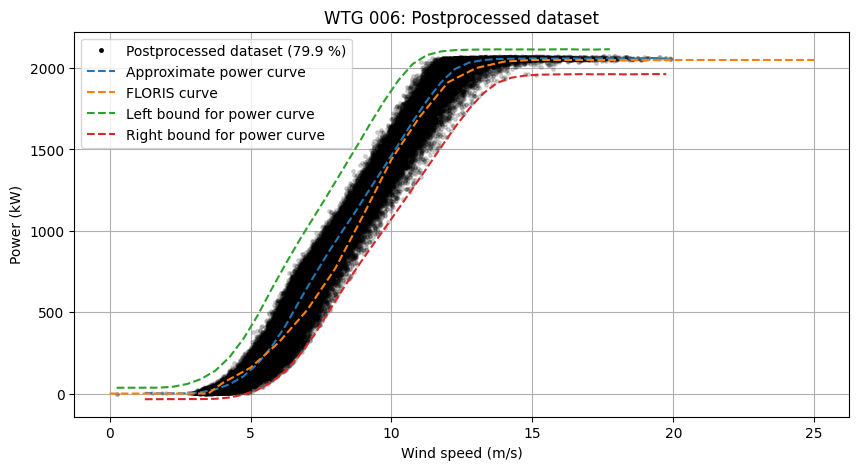

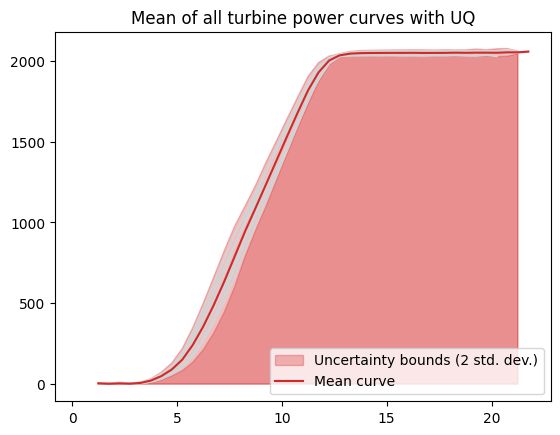

In [4]:
def filter_by_ws_pow_curve(df, plot_figures=True, save_figures=False):
    # Load the FLORIS model for the wind farm. This is not used for anything
    # besides plotting the floris-predicted wind speed-power curve on top
    # of the actual data.
    fi = load_floris()

    # Downsample data. Not necessary here, but can be useful if we have 1 Hz
    # data available. Namely, it's hard to detect outliers on such a high
    # resolution. Instead, we are better off downsampling the data to 60s or
    # even 600s and filter the data based on decisions there. The following
    # downsampled dataframe should then be inserted into the wind speed power
    # curve filtering class. Mapping the filtering back to the high-resolution
    # data is done by a couple lines of code as found at the end of this
    # script.
    #
    # df_movavg, data_indices_mapping = top.df_movingaverage(
    #     df_in=df_1s,
    #     cols_angular=[
    #         c for c in df_1s.columns if (
    #             ("vane_" in c) or
    #             ("yaw_" in c) or
    #             ("wd_" in c) or
    #             ("direction" in c)
    #         )
    #     ],
    #     window_width=td(seconds=600),
    #     calc_median_min_max_std=False,
    #     return_index_mapping=True,
    # )

    # Create output directory
    if (plot_figures) & (save_figures):
        root_path = os.getcwd()
        figure_save_path = os.path.join(root_path, "postprocessed", "figures", "04_wspowcurve_filtered")
        os.makedirs(figure_save_path, exist_ok=True)
    else:
        figure_save_path = None

    # Initialize the wind speed power curve filtering class
    ws_pow_filtering = wspf.ws_pw_curve_filtering(df=df)

    # Apply a set of logic filters on the turbine measurements
    n_turbines = dfm.get_num_turbines(df)
    for ti in range(n_turbines):
        # Filter for NaN wind speed or power productions
        ws_pow_filtering.filter_by_condition(
            condition=(
            ws_pow_filtering.df["ws_{:03d}".format(ti)].isna() |
            ws_pow_filtering.df["pow_{:03d}".format(ti)].isna()
            ),
            label="Wind speed and/or power is NaN",
            ti=ti,
            verbose=True,
        )

        # Filter for numerical issues
        ws_pow_filtering.filter_by_condition(
            condition=(ws_pow_filtering.df["ws_{:03d}".format(ti)] < -1.0e-6),
            label="Wind speed below zero",
            ti=ti,
            verbose=True,
        )

        # Filter for numerical issues
        ws_pow_filtering.filter_by_condition(
            condition=(ws_pow_filtering.df["pow_{:03d}".format(ti)] < -1.0e-6),
            label="Power below zero",
            ti=ti,
            verbose=True,
        )

        # Filter for numerical issues
        ws_pow_filtering.filter_by_condition(
            condition=(ws_pow_filtering.df["ws_{:03d}".format(ti)] > 50),
            label="Wind speed above 50 m/s",
            ti=ti,
            verbose=True,
        )

        # Filter for numerical issues: note, make sure power is in kW
        ws_pow_filtering.filter_by_condition(
            condition=(ws_pow_filtering.df["pow_{:03d}".format(ti)] > 30e3),
            label="Power above 30 MW",
            ti=ti,
            verbose=True,
        )

        # Filter for power production is zero above cut-in wind speeds
        ws_pow_filtering.filter_by_condition(
            condition=(ws_pow_filtering.df["ws_{:03d}".format(ti)] > 4.0) & (ws_pow_filtering.df["pow_{:03d}".format(ti)] < 1.0),
            label="Power below 1 kW while wind speed above 4 m/s",
            ti=ti,
            verbose=True,
        )

        # Flag curtailment by marking measurements with a high wind speed but lower power production 
        # as faulty. Note that this will only catch obvious outliers because it is difficult to 
        # identify curtailment using a single wind speed and power threshold. More sophisticated outlier 
        # conditions could be added here though.
        ws_pow_filtering.filter_by_condition(
            condition=(
                (ws_pow_filtering.df["ws_{:03d}".format(ti)] > 14.0) &
                (ws_pow_filtering.df["pow_{:03d}".format(ti)] < 1850.0)
            ),
            label="Curtailment: wind speed above 14 m/s but power below 1850 kW",
            ti=ti,
            verbose=True,
        )
        
        # Other common filters here are based on turbine-specific/OEM-specific flags. For example,
        # a 'run counter' may indicate how many seconds of a 10-minute period the turbine was
        # reporting valid measurements. By filtering for the condition that that value is 600, or
        # above 590, you should be able to quickly identify a large part of faulty measurements.
        # Similarly, you may want to look for 'turbineOK' and 'normal_operation' flag of the
        # turbine.
        #
        # Additionally, if you have blade pitch angle measurements, you may be able to filter
        # for outliers by looking when blade pitch angles exceed, e.g., 70 degrees. These filter
        # steps very much depend on the dataset that you have access to. 
        # 
        # Another useful variable is 'power setpoint', if that is available. You can use this
        # to detect and then filter for turbine curtailment (i.e., turbine setpoint lower
        # than available power on purpose). Same thing goes for derating codes, signifying
        # particular derating/curtailment behavior, power mode signals, alarm signals.
        #
        # In this case, we have an operational status flag, which we have called is_operation_normal, 
        # indicating if a turbine is oeprating normally or if it is derated or shut down. If that has 
        # a 'False' value, then we mark those measurements as faulty.
        ws_pow_filtering.filter_by_condition(
            condition=(ws_pow_filtering.df["is_operation_normal_{:03d}".format(ti)] == False),
            label="Self-flagged (is_operation_normal==False)",
            ti=ti,
            verbose=True,
        )

        # Filter for sensor-stuck faults
        ws_pow_filtering.filter_by_sensor_stuck_faults(
            columns=["wd_{:03d}".format(ti), "ws_{:03d}".format(ti)],
            ti=ti,
            n_consecutive_measurements=3,
            stddev_threshold=0.001,
            plot=False,
        )

        # Now filter iteratively by deviations from the median power curve.
        # Common reason for measurements with a low wind speed but a high power
        # production (i.e., to the left of the mean curve) is icing or dirt on the
        # wind speed sensor, or generally a the wind speed sensor being obstructed
        # in some way.
        ws_pow_filtering.filter_by_power_curve(
            ti=ti,
            ws_deadband=1.5,
            pow_deadband=70.0,
            cutoff_ws=20.0,
            m_pow_rb=0.97,
        )

        # An additional filtering step we may consider here is removing all measurements
        # directly after a NaN. The reasoning behind this is that the wind farm flow
        # may still be affected by an outlier/odd turbine behavior the 10 minutes
        # after that problem was solved, due to wake propagation delays.
        # Note that this doubles the number of NaNs in your dataset and thereby decreases
        # the useful data pool. In this example, we decide not to filter for that.

        # Plot and save data for current dataframe
        ws_pow_filtering.plot_filters_in_ws_power_curve(ti=ti, fi=fi)
        ws_pow_filtering.plot_filters_in_time(ti=ti)
        ws_pow_filtering.plot_postprocessed_in_ws_power_curve(ti=ti, fi=fi)
        print("\n")

    # Plot farm-averaged power curve based on the data (useful to e.g., feed into FLORIS when not provided by OEM)
    ws_pow_filtering.plot_farm_mean_power_curve()

    # Get filtered dataframe and power curve
    df = ws_pow_filtering.get_df()
    df_pow_curve = ws_pow_filtering.pw_curve_df

    return df, df_pow_curve


df_scada_filtered, df_pow_curve = filter_by_ws_pow_curve(
    df=df_scada_formatted.copy()
)

# **Step 3**: Plot faults vs. the layout
Next, let's plot the wind plant layout with the percentage of the data set remaining after removing abnormal data indicated.

Saving figure to figures/01_filter_ws_power_curves/faults_by_layout.png.


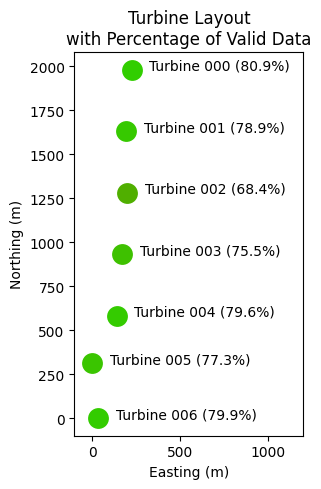

In [5]:
def plot_faults_vs_layout(df):
    fi = load_floris()

    layout_x = fi.layout_x
    layout_y = fi.layout_y

    num_turbines = dfm.get_num_turbines(df)
    fault_ratio = np.zeros(num_turbines)
    for ti in range(num_turbines):
        fault_ratio[ti] = (
            dff.df_get_no_faulty_measurements(df, ti) / df.shape[0]
        )

    # Plot layout and colormap
    fig, ax = plt.subplots(figsize=(14, 5))
    for ti in range(num_turbines):
        clr = [fault_ratio[ti], 1.0 - fault_ratio[ti], 0.0]
        ax.plot(
            layout_x[ti],
            layout_y[ti],
            "o",
            markersize=15,
            markerfacecolor=clr,
            markeredgewidth=0.0,
        )
        ax.text(
            layout_x[ti] + 100,
            layout_y[ti],
            "Turbine %03d (%.1f%%)" % (ti, (1.0 - fault_ratio[ti]) * 100.0),
            color="black",
        )
        ax.set_xlim([-100, 1200])
    ax.set_aspect('equal')
    ax.set_ylabel("Northing (m)")
    ax.set_xlabel("Easting (m)")
    ax.set_title("Turbine Layout\nwith Percentage of Valid Data")
    fig.tight_layout()

    root_path = os.getcwd()
    out_path = os.path.join(
        root_path,
        "figures",
        "01_filter_ws_power_curves",
    )
    fig_out = os.path.join(out_path, "faults_by_layout.png")
    print("Saving figure to {:s}.".format(os.path.relpath(fig_out)))
    os.makedirs(out_path, exist_ok=True)
    plt.savefig(fig_out, dpi=300)

plot_faults_vs_layout(df_scada_filtered)

# **Save postprocessed data** to a local file
Lastly, we'll save the filtered SCADA data frame locally. This data frame will be used as the starting point in the next example notebook.

In [6]:
root_path = os.getcwd()
fout = os.path.join(root_path, "postprocessed", "df_scada_60s_wspowfiltered.ftr")
df_scada_filtered.to_feather(fout)
print("File saved to '{:s}'.".format(os.path.relpath(fout)))

File saved to 'postprocessed/df_scada_60s_wspowfiltered.ftr'.
